In [1]:
import pandas as pd
import numpy as np
import sklearn 

In [2]:
# note that here we are going to use the mini corpus with 100,000 datapoints for computational reasons
clean_corpus = pd.read_csv('clean_corpus_mini.csv')

In [3]:
clean_corpus.head()

,Sentiment,CleanText
0,0,pembsdave happening
1,0,brhodes u didnt invite hope u enough drinks us
2,0,house watching tv mommy boys gone drinking jui...
3,0,germany lost another time song wasn bad
4,1,cliff nervous bladder


In [4]:
clean_corpus.shape

(100000, 2)

In [5]:
# there may be some missing values in cleantext; drop those
clean_corpus.dropna(inplace = True)

In [6]:
clean_corpus.shape

(99875, 2)

In [7]:
# Split the data for training (90% of data) and testing (10% of data)

from sklearn.cross_validation import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(clean_corpus['CleanText'], clean_corpus['Sentiment'],test_size=0.1)

In [8]:
print (X_train.shape, X_test.shape, Y_train.shape , Y_test.shape)

(89887,) (9988,) (89887,) (9988,)


In [9]:
# Create bag of words for training data

from sklearn.feature_extraction.text import CountVectorizer

In [10]:
# Initialize the "CountVectorizer" object, which is sklearn's bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",tokenizer = None,preprocessor = None, stop_words = None,
                             max_features = 5000) 

In [11]:
# fit_transform() does two functions: First, it fits the model and learns the vocabulary; second, it transforms our 
# training data into feature vectors. 

# The input to fit_transform should be a list of strings.
X_train_list = X_train.tolist()

# now we can use the fit_transform function
train_data_features = vectorizer.fit_transform(X_train_list)

# Numpy arrays are easy to work with, so convert the result to an array
train_data_features = train_data_features.toarray()

print ('train_data_features done')

train_data_features done


In [12]:
# Get a bag of words for the test set, and convert to a numpy array

X_test_list = X_test.tolist()

# VERY IMPORTANT: On test data, we ONLY use transform... we DO NOT FIT IT! 
test_data_features = vectorizer.transform(X_test_list)
test_data_features = test_data_features.toarray()

print ('test_data_features done')

test_data_features done


In [13]:
train_data_features.shape

(89887, 5000)

In [14]:
test_data_features.shape

(9988, 5000)

In [15]:
'''
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 100) 

# Fit the forest to the training set, using the bag of words as features and the sentiment labels as the response 
# variable

# This may take a few minutes to run
forest = forest.fit( train_data_features, Y_train )

test_pred = forest.predict(test_data_features)
'''

'\nfrom sklearn.ensemble import RandomForestClassifier\n\n# Initialize a Random Forest classifier with 100 trees\nforest = RandomForestClassifier(n_estimators = 100) \n\n# Fit the forest to the training set, using the bag of words as features and the sentiment labels as the response \n# variable\n\n# This may take a few minutes to run\nforest = forest.fit( train_data_features, Y_train )\n\ntest_pred = forest.predict(test_data_features)\n'

In [16]:
'''train_score = forest.score(train_data_features, Y_train)
test_score = forest.score(test_data_features, Y_test)

print (train_score) #0.9844
print (test_score)  #0.7277
'''

'train_score = forest.score(train_data_features, Y_train)\ntest_score = forest.score(test_data_features, Y_test)\n\nprint (train_score) #0.9844\nprint (test_score)  #0.7277\n'

In [17]:
'''# confusion matrix and a classification report

from sklearn import metrics
from sklearn.cross_validation import cross_val_score

print (metrics.confusion_matrix(Y_test, test_pred))
print (metrics.classification_report(Y_test, test_pred))
'''

'# confusion matrix and a classification report\n\nfrom sklearn import metrics\nfrom sklearn.cross_validation import cross_val_score\n\nprint (metrics.confusion_matrix(Y_test, test_pred))\nprint (metrics.classification_report(Y_test, test_pred))\n'

In [18]:
Y_test.mean() # null error rate = 0.5246

0.53604325190228275

In [19]:
from sklearn.naive_bayes import MultinomialNB

# Initialize a Multinomial NB classifier 
mnb = MultinomialNB() 

# Fit the MNB classifier to the training set, using the bag of words as features and the sentiment labels as the 
# response variable

# This may take a few minutes to run
mnb = mnb.fit( train_data_features, Y_train )

mnb_test_pred = mnb.predict(test_data_features)

In [20]:
# MNB test accuracy 

mnb_test_score = mnb.score(test_data_features, Y_test)

print (mnb_test_score)

0.757308770525


In [22]:
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

print (metrics.confusion_matrix(Y_test, mnb_test_pred))
print (metrics.classification_report(Y_test, mnb_test_pred))

[[3422 1212]
 [1212 4142]]
             precision    recall  f1-score   support

          0       0.74      0.74      0.74      4634
          1       0.77      0.77      0.77      5354

avg / total       0.76      0.76      0.76      9988



In [23]:
clean_tweets = pd.read_csv('rockets_cleantext.csv', header = False)

In [24]:
clean_tweets.shape

(105783, 1)

In [25]:
clean_tweets.head()

,CleanText
0,getting ready game rockets vs warriors warrior...
1,iamc mart lil b curse james harden curtains ro...
2,tonight free pick houston rockets u
3,let go rockets
4,rockets boutta win game


In [26]:
# there may be some missing values in in rockets_data_features; drop those
clean_tweets.dropna(inplace = True)

In [27]:
clean_tweets.shape

(105783, 1)

In [28]:
# The input to transform should be a list of strings.
rockets_list = clean_tweets['CleanText'].values.tolist()

In [29]:
rockets_list[0:5]

['getting ready game rockets vs warriors warriors spashbros nba basketball besureinc co glrexsuchm',
 'iamc mart lil b curse james harden curtains rockets',
 'tonight free pick houston rockets u',
 'let go rockets',
 'rockets boutta win game']

In [30]:
# get the bag of words on the rockets tweets
rockets_data_features = vectorizer.transform(rockets_list)

In [31]:
rockets_data_features.shape

(105783, 5000)

In [32]:
rockets_data_features = rockets_data_features.toarray()

In [33]:
# now run the multinomial NB model to predict sentiment values for the rockets

mnb_rockets_pred = mnb.predict(rockets_data_features)

In [34]:
mnb_rockets_pred[0:5]

array([1, 0, 1, 0, 1])

In [35]:
clean_tweets['Sentiment'] = mnb_rockets_pred

In [36]:
clean_tweets[0:15]

,CleanText,Sentiment
0,getting ready game rockets vs warriors warrior...,1
1,iamc mart lil b curse james harden curtains ro...,0
2,tonight free pick houston rockets u,1
3,let go rockets,0
4,rockets boutta win game,1
5,complexmag rockets fans begging lil b put base...,1
6,lildelvin rockets take l today,0
7,sportscenter rockets warriors meet game et esp...,1
8,nah cuh chill co qqrlnevt,1
9,rjthamacrj rockets play warriors hope kevin mc...,1


In [37]:
pos = clean_tweets[clean_tweets['Sentiment'] == 1]

In [38]:
pos.shape

(56948, 2)

In [39]:
neg = clean_tweets[clean_tweets['Sentiment'] == 0]

In [40]:
neg.shape

(48835, 2)

In [41]:
clean_tweets.to_csv('twittercorpus_sentiment.csv',index = False)

In [55]:
pos.head()

,CleanText,Sentiment
0,getting ready game rockets vs warriors warrior...,1
2,tonight free pick houston rockets u,1
4,rockets boutta win game,1
5,complexmag rockets fans begging lil b put base...,1
7,sportscenter rockets warriors meet game et esp...,1


In [134]:
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [114]:
clean_tweets['Sentiment Category'] = clean_tweets.Sentiment.map({0: "Negative", 1: "Positive"})

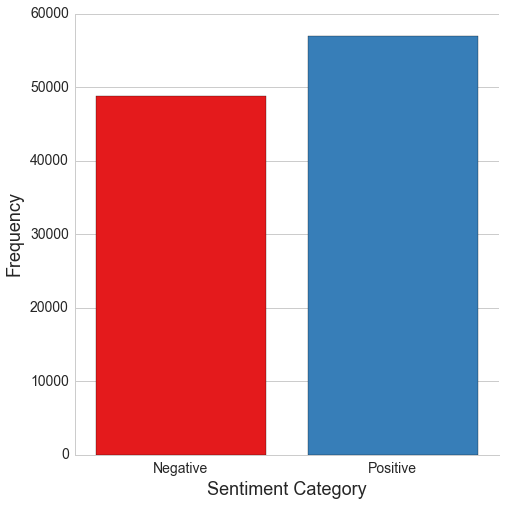

In [135]:
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)
sns.factorplot('Sentiment Category',data=clean_tweets,palette='Set1', size = 7, aspect = 1)

plt.xlabel('Sentiment Category', fontsize = 18)
plt.ylabel('Frequency', fontsize = 18)